In [ ]:

!pip install -U nltk
!pip install matplotlib==3.4.1
!pip install gdown
import pandas as pd
import nltk
import statistics
nltk.download('punkt')
nltk.download('wordnet')
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import WhitespaceTokenizer
# from rouge_score import rouge_scorer

nltk.download('omw-1.4')

from nltk.translate.bleu_score import SmoothingFunction
smoothie = SmoothingFunction().method7


import string
from nltk.translate.bleu_score import sentence_bleu


from nltk.translate.bleu_score import corpus_bleu
! pip install rouge-score



In [ ]:
# ! gdown --id 1gqhJ9mQGofEMbzI3lfCSByj6HcTa25h1

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1gqhJ9mQGofEMbzI3lfCSByj6HcTa25h1
To: /content/indic_dataset.zip
100% 129M/129M [00:02<00:00, 60.3MB/s]


In [ ]:
# ! unzip indic_dataset.zip

Archive:  indic_dataset.zip
   creating: indic_dataset/
  inflating: indic_dataset/new_indic_val.csv  
  inflating: indic_dataset/new_indic_test.csv  
  inflating: indic_dataset/new_indic_train.csv  


In [ ]:
# # Load the three datasets
# dataset1 = pd.read_csv("indic_dataset/new_indic_train.csv")
# dataset2 = pd.read_csv("indic_dataset/new_indic_test.csv")
# dataset3 = pd.read_csv("indic_dataset/new_indic_val.csv")



In [ ]:
# Load the three datasets
dataset1 = pd.read_csv("indic_test_bnpc_3.csv")
dataset2 = pd.read_csv("indic_train_bnpc_3.csv")
dataset3 = pd.read_csv("indic_val_bnpc_3.csv")



In [ ]:
# Merge the datasets
merged_dataset = pd.concat([dataset1, dataset2, dataset3])

merged_dataset.to_csv("indic_whole_3.csv", index=False)

In [ ]:
# merged_dataset = pd.read_csv("TaPaCo_whole.csv")

In [ ]:
# Filter and keep only samples with label 1
label_1_dataset = merged_dataset[merged_dataset['label'] == 1]

# Save the filtered dataset to a new CSV file
label_1_dataset.to_csv("tapaco_paraphrase_dataset.csv", index=False)

###Change the name of read_csv() in the following order

1.   train.csv
2.   val.csv
3.   test.csv

In [ ]:

# dataset = pd.read_csv('BnPC_paraphrase_dataset.csv')
# print(dataset)

In [ ]:
# dataset.columns


Index(['sentence1', 'sentence2', 'Shakirul', 'Sourav', 'Nobin', 'Shak Div',
       'Sou Div', 'Nob Div', 'Average', 'label', 'topic'],
      dtype='object')

In [ ]:
# df_filtered = dataset[dataset['label'] == 0].reset_index(drop=True)
# df_filtered
# dataset = df_pos
# dataset.columns
# df_pos = dataset.query('label == 1')
# df_pos
# df_filtered = dataset

In [ ]:
class BLEUScoreCalculator:
    def __init__(self, dataset):
        self.dataset = dataset
        self.smoothie = SmoothingFunction().method7

    def calculate_bleu_score(self):
        total_rows = self.dataset.shape[0]
        tot_score = []

        for i in range(total_rows):
            score = self.calculate_avg_bleu_score(i)
            tot_score.append(score)

        bleu_scores = [score * 100 for score in tot_score]
        return bleu_scores

    def calculate_avg_bleu_score(self, i):
        sentence1 = self.preprocess_text(self.dataset["sentence1"][i])
        sentence2 = self.preprocess_text(self.dataset["sentence2"][i])

        ref = WhitespaceTokenizer().tokenize(sentence1)
        ref1 = [ref]

        cand = WhitespaceTokenizer().tokenize(sentence2)
        score1 = sentence_bleu(ref1, cand, smoothing_function=self.smoothie)

        ref = WhitespaceTokenizer().tokenize(sentence2)
        ref1 = [ref]

        cand = WhitespaceTokenizer().tokenize(sentence1)
        score3 = sentence_bleu(ref1, cand, smoothing_function=self.smoothie)

        avg_s = (score1 + score3) / 2.0
        return avg_s

    def preprocess_text(self, text):
        text = text.translate(str.maketrans('', '', string.punctuation))
        text = text.replace('।', '')
        return text

    def calculate_average_bleu_score(self):
        bleu_scores = self.calculate_bleu_score()
        average = statistics.mean(bleu_scores)
        return average



In [ ]:
if __name__ == "__main__":
    bnpc_dataset = pd.read_csv("BnPC_paraphrase_dataset.csv")
    BUET_dataset = pd.read_csv("BUET_paraphrase_dataset.csv")
    # tapaco_dataset = pd.read_csv("tapaco_dataset.csv")
    indic_dataset = pd.read_csv("indic_paraphrase_dataset.csv")

    bnpc_calculator = BLEUScoreCalculator(bnpc_dataset)
    BUET_calculator = BLEUScoreCalculator(BUET_dataset)
    # tapaco_calculator = BLEUScoreCalculator(tapaco_dataset)
    indic_calculator = BLEUScoreCalculator(indic_dataset)

    bnpc_bleu = bnpc_calculator.calculate_average_bleu_score()
    BUET_bleu = BUET_calculator.calculate_average_bleu_score()
    # tapaco_bleu = tapaco_calculator.calculate_average_bleu_score()
    indic_bleu = indic_calculator.calculate_average_bleu_score()

    print(f"BNPC BLEU Score: {bnpc_bleu}")
    print(f"BUET BLEU Score: {BUET_bleu}")
    # print(f"tapaco BLEU Score: {tapaco_bleu}")
    print(f"indic BLEU Score: {indic_bleu}")

BNPC BLEU Score: 20.23729695900416
BUET BLEU Score: 17.07996396377371


In [ ]:
bnpc_dataset = pd.read_csv("BnPC_whole.csv")
bnpc_calculator = BLEUScoreCalculator(bnpc_dataset)
bnpc_bleu = bnpc_calculator.calculate_average_bleu_score()
print(f"BNPC BLEU Score: {bnpc_bleu}")

BNPC BLEU Score: 11.193822100814758


In [ ]:
BUET_dataset = pd.read_csv("buet_whole_3.csv")
BUET_calculator = BLEUScoreCalculator(BUET_dataset)
BUET_bleu = BUET_calculator.calculate_average_bleu_score()
print(f"BUET BLEU Score: {BUET_bleu}")

BUET BLEU Score: 9.915528105519407


### Find the avg BLEU score of the current dataset

In [ ]:
indic_dataset = pd.read_csv("indic_whole_3.csv")
indic_calculator = BLEUScoreCalculator(indic_dataset)
indic_bleu = indic_calculator.calculate_average_bleu_score()
print(f"indic BLEU Score: {indic_bleu}")

indic BLEU Score: 7.4688327091493365


In [ ]:
tapaco_dataset = pd.read_csv("tapaco_whole.csv")
tapaco_calculator = BLEUScoreCalculator(tapaco_dataset)
tapaco_bleu = tapaco_calculator.calculate_average_bleu_score()
print(f"tapaco BLEU Score: {tapaco_bleu}")

tapaco BLEU Score: 11.944650550894512


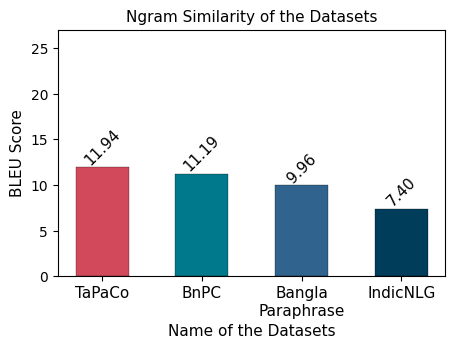

In [ ]:
import matplotlib.pyplot as plt

labels = ['TaPaCo', 'BnPC', 'Bangla\nParaphrase', 'IndicNLG']

# Values for the y-axis
values = [tapaco_bleu, bnpc_bleu, BUET_bleu, indic_bleu]

# Define the padding for the labels
label_padding = 1.5

# Create the bar plot
colors = ['#d1495b', '#00798c', '#30638e', '#003d5b']

# Adjusted x-positions for the bars
x_positions = [0, 1.5, 3, 4.5]

# Create the bar plot with hex colors and adjusted x-positions
plt.bar(x_positions, values, color=colors, edgecolor='black', linewidth=0.2)  # Add border

plt.xlabel('Name of the Datasets', fontsize=11)  # Adjust the fontsize as needed
plt.ylabel('BLEU Score', fontsize=11)  # Adjust the fontsize as needed
plt.title('Ngram Similarity of the Datasets', fontsize=11)  # Adjust the fontsize as needed

# Set x-axis ticks at the adjusted positions
plt.xticks(x_positions, labels, fontsize=11)

# Annotate formatted values on top of the bars with larger font
for i, v in enumerate(values):
    plt.text(x_positions[i], v, f'{v:.2f}', ha='center', va='bottom', fontsize=11, rotation=45)

# Set the width and height in inches and specify the dpi for the desired point size
width_inch = 5.0  # 220 points
height_inch = 3.2  # 150 points

dpi = 100  # Adjust the dpi to get the desired point size

fig = plt.gcf()
fig.set_size_inches(width_inch, height_inch)

# Increase the y-limit to 27 to accommodate the border
plt.ylim(0, 27)

# Save the plot as an SVG file with the specified DPI
plt.savefig("ngram_similarity.svg", format="svg", dpi=dpi)

# Show the plot
plt.show()


In [ ]:
! pip install git+https://github.com/faisaltareque/bangla_rouge_score
from bangla_rouge_score import rouge_scorer

In [ ]:
import pandas as pd
from bangla_rouge_score import rouge_scorer

bnpc_dataset = pd.read_csv("BnPC_whole.csv")

rouge1_scores = []
rouge2_scores = []
rougeL_scores = []

scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True, lang="bengali")

for index, row in bnpc_dataset.iterrows():
    sentence1 = row['sentence1']
    sentence2 = row['sentence2']

    scores = scorer.score(sentence1, sentence2)

    rouge1_scores.append(scores['rouge1'].fmeasure)
    rouge2_scores.append(scores['rouge2'].fmeasure)
    rougeL_scores.append(scores['rougeL'].fmeasure)

# Calculate and print the average scores
avg_rouge1 = sum(rouge1_scores) / len(rouge1_scores)
avg_rouge2 = sum(rouge2_scores) / len(rouge2_scores)
avg_rougeL = sum(rougeL_scores) / len(rougeL_scores)

print("BnPC Dataset")
print("Average Rouge-1 Score:", avg_rouge1, "Length: ", len(rouge1_scores))
print("Average Rouge-2 Score:", avg_rouge2, "Length: ", len(rouge2_scores))
print("Average Rouge-L Score:", avg_rougeL, "Length: ", len(rougeL_scores))


BnPC Dataset
Average Rouge-1 Score: 0.2841245836348043 Length:  8787
Average Rouge-2 Score: 0.10904122631031025 Length:  8787
Average Rouge-L Score: 0.2616298336443106 Length:  8787


In [ ]:
import pandas as pd
from bangla_rouge_score import rouge_scorer

BUET_dataset = pd.read_csv("buet_whole_2.csv")

rouge1_scores = []
rouge2_scores = []
rougeL_scores = []

scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True, lang="bengali")

for index, row in BUET_dataset.iterrows():
    sentence1 = row['sentence1']
    sentence2 = row['sentence2']

    scores = scorer.score(sentence1, sentence2)

    rouge1_scores.append(scores['rouge1'].fmeasure)
    rouge2_scores.append(scores['rouge2'].fmeasure)
    rougeL_scores.append(scores['rougeL'].fmeasure)

# Calculate and print the average scores
avg_rouge1 = sum(rouge1_scores) / len(rouge1_scores)
avg_rouge2 = sum(rouge2_scores) / len(rouge2_scores)
avg_rougeL = sum(rougeL_scores) / len(rougeL_scores)

print("BUET Dataset")
print("Average Rouge-1 Score:", avg_rouge1, "Length: ", len(rouge1_scores))
print("Average Rouge-2 Score:", avg_rouge2, "Length: ", len(rouge2_scores))
print("Average Rouge-L Score:", avg_rougeL, "Length: ", len(rougeL_scores))


BUET Dataset
Average Rouge-1 Score: 0.2934556454561515 Length:  8787
Average Rouge-2 Score: 0.08990443897659738 Length:  8787
Average Rouge-L Score: 0.26436358942193944 Length:  8787


In [ ]:
import pandas as pd
from bangla_rouge_score import rouge_scorer

indic_dataset = pd.read_csv("indic_whole_2.csv")

rouge1_scores = []
rouge2_scores = []
rougeL_scores = []

scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True, lang="bengali")

for index, row in indic_dataset.iterrows():
    sentence1 = row['sentence1']
    sentence2 = row['sentence2']

    scores = scorer.score(sentence1, sentence2)

    rouge1_scores.append(scores['rouge1'].fmeasure)
    rouge2_scores.append(scores['rouge2'].fmeasure)
    rougeL_scores.append(scores['rougeL'].fmeasure)

# Calculate and print the average scores
avg_rouge1 = sum(rouge1_scores) / len(rouge1_scores)
avg_rouge2 = sum(rouge2_scores) / len(rouge2_scores)
avg_rougeL = sum(rougeL_scores) / len(rougeL_scores)

print("IndicNLG Dataset")
print("Average Rouge-1 Score:", avg_rouge1, "Length: ", len(rouge1_scores))
print("Average Rouge-2 Score:", avg_rouge2, "Length: ", len(rouge2_scores))
print("Average Rouge-L Score:", avg_rougeL, "Length: ", len(rougeL_scores))


IndicNLG Dataset
Average Rouge-1 Score: 0.20264347596689386 Length:  8707
Average Rouge-2 Score: 0.05403356590071159 Length:  8707
Average Rouge-L Score: 0.18736293605782414 Length:  8707


In [ ]:
import pandas as pd
from bangla_rouge_score import rouge_scorer

tapaco_dataset = pd.read_csv("tapaco_whole.csv")

rouge1_scores = []
rouge2_scores = []
rougeL_scores = []

scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True, lang="bengali")

for index, row in tapaco_dataset.iterrows():
    sentence1 = row['sentence1']
    sentence2 = row['sentence2']

    scores = scorer.score(sentence1, sentence2)

    rouge1_scores.append(scores['rouge1'].fmeasure)
    rouge2_scores.append(scores['rouge2'].fmeasure)
    rougeL_scores.append(scores['rougeL'].fmeasure)

# Calculate and print the average scores
avg_rouge1 = sum(rouge1_scores) / len(rouge1_scores)
avg_rouge2 = sum(rouge2_scores) / len(rouge2_scores)
avg_rougeL = sum(rougeL_scores) / len(rougeL_scores)

print("TaPaCo Dataset")
print("Average Rouge-1 Score:", avg_rouge1, "Length: ", len(rouge1_scores))
print("Average Rouge-2 Score:", avg_rouge2, "Length: ", len(rouge2_scores))
print("Average Rouge-L Score:", avg_rougeL, "Length: ", len(rougeL_scores))


TaPaCo Dataset
Average Rouge-1 Score: 0.3019971724206326 Length:  5181
Average Rouge-2 Score: 0.11266353744924978 Length:  5181
Average Rouge-L Score: 0.2937514692237131 Length:  5181


In [ ]:
import pandas as pd
from bangla_rouge_score import rouge_scorer


class RougeScoreCalculator:
    def __init__(self, dataset_path, dataset_name):
        self.dataset = pd.read_csv(dataset_path)
        self.dataset_name = dataset_name
        self.rouge1_scores = []
        self.rouge2_scores = []
        self.rougeL_scores = []
        self.scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True, lang="bengali")

    def calculate_rouge_scores(self):
        for index, row in self.dataset.iterrows():
            sentence1 = row['sentence1']
            sentence2 = row['sentence2']
            scores = self.scorer.score(sentence1, sentence2)
            self.rouge1_scores.append(scores['rouge1'].fmeasure)
            self.rouge2_scores.append(scores['rouge2'].fmeasure)
            self.rougeL_scores.append(scores['rougeL'].fmeasure)

    def calculate_average_scores(self):
        avg_rouge1 = sum(self.rouge1_scores) / len(self.rouge1_scores)
        avg_rouge2 = sum(self.rouge2_scores) / len(self.rouge2_scores)
        avg_rougeL = sum(self.rougeL_scores) / len(self.rougeL_scores)

        print(len(self.rouge1_scores))
        print(len(self.rouge2_scores))
        print(len(self.rougeL_scores))
        self.average_rouge1 = avg_rouge1
        self.average_rouge2 = avg_rouge2
        self.average_rougeL = avg_rougeL

In [ ]:
bnpc_calculator = RougeScoreCalculator("BnPC_whole.csv", "BnPC Dataset")
bnpc_calculator.calculate_rouge_scores()
bnpc_calculator.calculate_average_scores()

average_rouge1_bnpc = bnpc_calculator.average_rouge1
average_rouge2_bnpc = bnpc_calculator.average_rouge2
average_rougeL_bnpc = bnpc_calculator.average_rougeL

print(average_rouge1_bnpc)
print(average_rouge2_bnpc)
print(average_rougeL_bnpc)

8787
8787
8787
0.2841245836348043
0.10904122631031025
0.2616298336443106


In [ ]:
buet_calculator = RougeScoreCalculator("buet_whole_3.csv", "BUET Dataset 1")
buet_calculator.calculate_rouge_scores()
buet_calculator.calculate_average_scores()

# Access the average ROUGE scores for each dataset
average_rouge1_buet = buet_calculator.average_rouge1
average_rouge2_buet = buet_calculator.average_rouge2
average_rougeL_buet = buet_calculator.average_rougeL



print(average_rouge1_buet)
print(average_rouge2_buet)
print(average_rougeL_buet)

8787
8787
8787
0.2930270151847398
0.08908643563033893
0.263228644185579


In [ ]:
indic_calculator = RougeScoreCalculator("indic_whole_3.csv", "Indic Dataset 1")
indic_calculator.calculate_rouge_scores()
indic_calculator.calculate_average_scores()

average_rouge1_indic = indic_calculator.average_rouge1
average_rouge2_indic = indic_calculator.average_rouge2
average_rougeL_indic = indic_calculator.average_rougeL


print(average_rouge1_indic)
print(average_rouge2_indic)
print(average_rougeL_indic)


8707
8707
8707
0.20536849155266348
0.053882524165064775
0.18993961330336723


In [ ]:
tapaco_calculator = RougeScoreCalculator("tapaco_whole.csv", "Tapaco Dataset")
tapaco_calculator.calculate_rouge_scores()
tapaco_calculator.calculate_average_scores()

average_rouge1_tapaco = tapaco_calculator.average_rouge1
average_rouge2_tapaco = tapaco_calculator.average_rouge2
average_rougeL_tapaco = tapaco_calculator.average_rougeL


print(average_rouge1_tapaco)
print(average_rouge2_tapaco)
print(average_rougeL_tapaco)

5181
5181
5181
0.3019971724206326
0.11266353744924978
0.2937514692237131


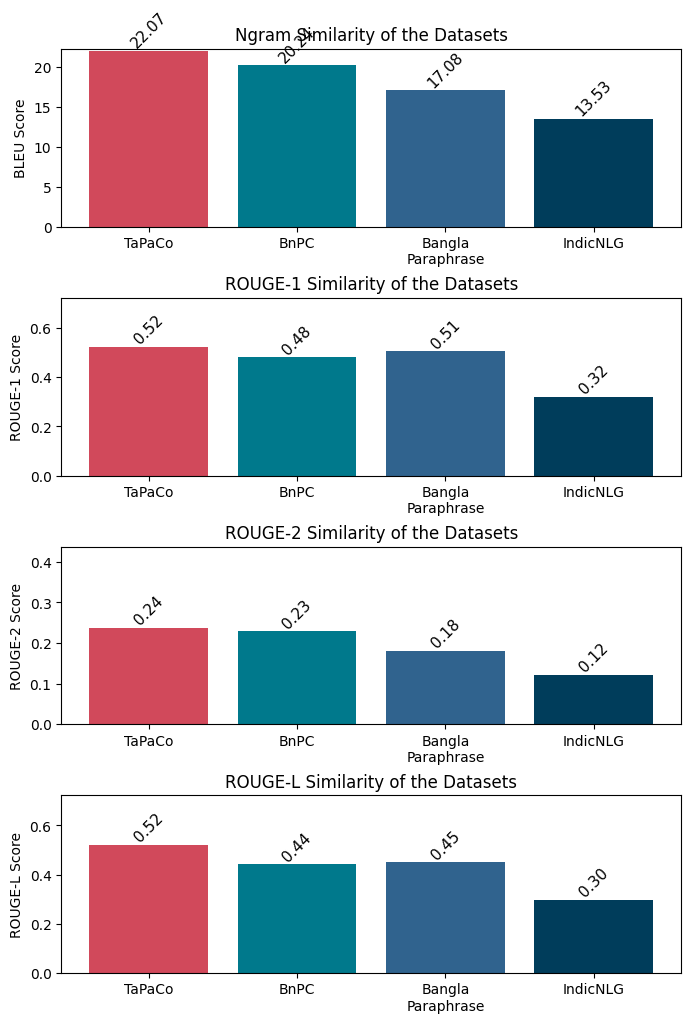

In [ ]:
import matplotlib.pyplot as plt

# Data
dataset_names = ['TaPaCo', 'BnPC', 'Bangla\nParaphrase', 'IndicNLG']

# BLEU scores for each dataset
bleu_scores = [tapaco_bleu, bnpc_bleu, BUET_bleu, indic_bleu]

# ROUGE scores for each dataset
average_rouge1_scores = [average_rouge1_tapaco, average_rouge1_bnpc, average_rouge1_buet, average_rouge1_indic]
average_rouge2_scores = [average_rouge2_tapaco, average_rouge2_bnpc, average_rouge2_buet, average_rouge2_indic]
average_rougeL_scores = [average_rougeL_tapaco, average_rougeL_bnpc, average_rougeL_buet, average_rougeL_indic]

# Plot settings
fig, axs = plt.subplots(4, 1, figsize=(8, 12))
plt.subplots_adjust(hspace=0.4)

# Plotting each subplot
for i, (scores, metric, title) in enumerate(zip([bleu_scores, average_rouge1_scores, average_rouge2_scores, average_rougeL_scores], ['BLEU', 'ROUGE-1', 'ROUGE-2', 'ROUGE-L'], ['Ngram Similarity', 'ROUGE-1 Similarity', 'ROUGE-2 Similarity', 'ROUGE-L Similarity'])):
    axs[i].bar(dataset_names, scores, color=['#d1495b', '#00798c', '#30638e', '#003d5b'])
    axs[i].set_ylabel(f'{metric} Score')
    axs[i].set_title(f'{title} of the Datasets')
    axs[i].set_ylim(0, max(scores) + 0.2)  # Adjust ylim to accommodate the scores

    # Annotate values on top of the bars
    for j, v in enumerate(scores):
        axs[i].text(j, v, f'{v:.2f}', ha='center', va='bottom', fontsize=11, rotation=45)

# Save the plot as an SVG file
plt.savefig("scores_subplots.svg", format="svg")

# Show the plot
plt.show()

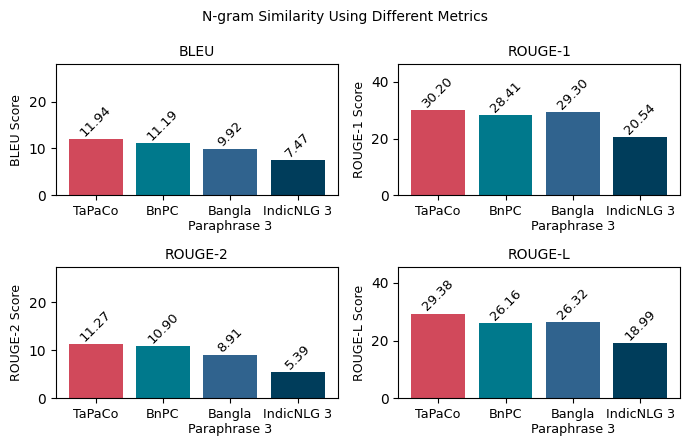

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
dataset_names = ['TaPaCo', 'BnPC', 'Bangla\nParaphrase 3', 'IndicNLG 3']

# BLEU scores for each dataset
bleu_scores = [tapaco_bleu, bnpc_bleu, BUET_bleu, indic_bleu]

# ROUGE scores for each dataset
average_rouge1_scores = [average_rouge1_tapaco, average_rouge1_bnpc, average_rouge1_buet, average_rouge1_indic]
average_rouge2_scores = [average_rouge2_tapaco, average_rouge2_bnpc, average_rouge2_buet, average_rouge2_indic]
average_rougeL_scores = [average_rougeL_tapaco, average_rougeL_bnpc, average_rougeL_buet, average_rougeL_indic]

average_rouge1_scores = [score * 100 for score in average_rouge1_scores]
average_rouge2_scores = [score * 100 for score in average_rouge2_scores]
average_rougeL_scores = [score * 100 for score in average_rougeL_scores]

# Plot settings
fig, axs = plt.subplots(2, 2, figsize=(7, 4.5))

# Plotting each subplot in a 2x2 grid
for i, (scores, metric, title) in enumerate(zip([bleu_scores, average_rouge1_scores, average_rouge2_scores, average_rougeL_scores], ['BLEU', 'ROUGE-1', 'ROUGE-2', 'ROUGE-L'], ['BLEU', 'ROUGE-1', 'ROUGE-2', 'ROUGE-L'])):
    row = i // 2
    col = i % 2
    axs[row, col].bar(dataset_names, scores, color=['#d1495b', '#00798c', '#30638e', '#003d5b'])
    axs[row, col].set_ylabel(f'{metric} Score', fontsize=9)
    axs[row, col].set_title(f'{title}', fontsize=10)
    axs[row, col].set_ylim(0, max(scores) + 16)  # Adjust ylim to accommodate the scores

    # Annotate values on top of the bars
    for j, v in enumerate(scores):
        axs[row, col].text(j, v, f'{v:.2f}', ha='center', va='bottom', fontsize=9.5, rotation=45)

    # Customize x-label font size
    axs[row, col].tick_params(axis='x', labelsize=9.2)

# Set a title for the entire plot
fig.suptitle('N-gram Similarity Using Different Metrics', fontsize=10)

# Adjust the layout for better readability
plt.tight_layout()

# Save the plot as an SVG file
plt.savefig("scores_subplots.svg", format="svg")

# Show the plot
plt.show()


In [ ]:
# print(dataset)
# dataset.to_csv('After_Adding_Meteor_fail.csv', index=False)
dataset.head()

,sentence1,sentence2,label,BLEU_Score
0,"ফেসবুকে অস্ত্র হাতে ছবি, আলোচনায় এমপি বাবলু",এমপি বাবলুর ফেসবুকে নগ্ন ছবি,0,0.129057
1,"ফেসবুকে অস্ত্র হাতে ছবি, আলোচনায় এমপি বাবলু",ফেসবুকে পিস্তল হাতে বগুড়ার এমপি বাবলু,1,0.196708
2,"ফেসবুকে অস্ত্র হাতে ছবি, আলোচনায় এমপি বাবলু",অস্ত্রের পর এবার নগ্ন ছবি সেই এমপির ফেসবুকে,0,0.111631
3,এমপি বাবলুর ফেসবুকে নগ্ন ছবি,ফেসবুকে পিস্তল হাতে বগুড়ার এমপি বাবলু,0,0.126844
4,এমপি বাবলুর ফেসবুকে নগ্ন ছবি,নতুন কেনা পিস্তল হাতে বগুড়ার এমপির ছবি ভাইরাল,0,0.083288


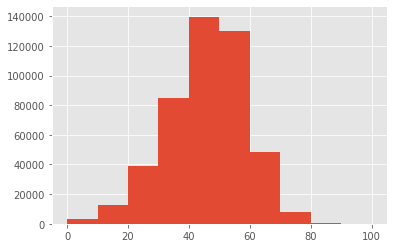

In [ ]:
from matplotlib import pyplot as plt
cosine_sims = [round(ele*100) for ele in cosine_sims]
plt.hist(cosine_sims, 10)

plt.show()

This cell gives the threshold score and threshold index for the highest F1 score

In [ ]:
from sklearn.metrics import f1_score, classification_report, accuracy_score

F1_Score = list()

total_rows = dataset.shape[0]

f_s = 0

Fsc = 0.0

dataset
label_list = dataset['label'].tolist()

while(Fsc<=1.0):

  compare_list = list()
  for i in range(total_rows):
    bleu_score = dataset["BLEU_Score"][i]
    if (bleu_score >= Fsc):
      filtered_score = 1

      compare_list.append(filtered_score)
    else:

      filtered_score = 0
      compare_list.append(filtered_score)

  Fsc += 0.001
  f_s = f1_score(label_list,compare_list,average='weighted')
  F1_Score.append(f_s)




print(F1_Score)
print(len(F1_Score))

max_value = max(F1_Score)

print(max_value)

max_index = F1_Score.index(max_value)

print(f'Index: {max_index}')



[0.23686350172416945, 0.737732986885797, 0.737732986885797, 0.737732986885797, 0.737732986885797, 0.737732986885797, 0.737732986885797, 0.737732986885797, 0.737732986885797, 0.737732986885797, 0.737732986885797, 0.737732986885797, 0.737732986885797, 0.737732986885797, 0.737732986885797, 0.737732986885797, 0.737732986885797, 0.737732986885797, 0.737732986885797, 0.737732986885797, 0.737732986885797, 0.737732986885797, 0.737732986885797, 0.737732986885797, 0.737732986885797, 0.737732986885797, 0.737732986885797, 0.737732986885797, 0.737732986885797, 0.737732986885797, 0.737732986885797, 0.737732986885797, 0.737732986885797, 0.737732986885797, 0.737732986885797, 0.737732986885797, 0.737732986885797, 0.737732986885797, 0.737732986885797, 0.737732986885797, 0.737732986885797, 0.737732986885797, 0.737732986885797, 0.737732986885797, 0.7384409363036949, 0.7384409363036949, 0.7384409363036949, 0.7384409363036949, 0.7384409363036949, 0.7384409363036949, 0.7384409363036949, 0.7398556479519333, 0

Run Each of the files and note down the index that gives the highest F1 Score

In [ ]:
# train Threshold = 123
# val Threshold = 106
# test Threshold = (123+106)/2.0
(123+106)/2.0

114.5

In [ ]:
dataset

total_rows = dataset.shape[0]

filtered_score = 0

compare_list = list()

for i in range(total_rows):
  bleu_score = dataset["BLEU_Score"][i]


  if (bleu_score >= 0.115): # Take the avg of the train and val set thresholds as test set threshold
    filtered_score = 1

    compare_list.append(filtered_score)
  else:

    filtered_score = 0
    compare_list.append(filtered_score)






from sklearn.metrics import f1_score, classification_report, accuracy_score, precision_score, recall_score


dataset
label_list = dataset['label'].tolist()

print('label list : ',label_list)
print('compare list : ', compare_list)

print(classification_report(label_list,compare_list,digits=4))
print('Precision', precision_score(label_list,compare_list, average='weighted')*100)
print('Recall', recall_score(label_list,compare_list, average='weighted')*100)
print('F1 Score : ',f1_score(label_list,compare_list,average='weighted')*100)
print('Accuracy : ',accuracy_score(label_list, compare_list)*100)

label list :  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0

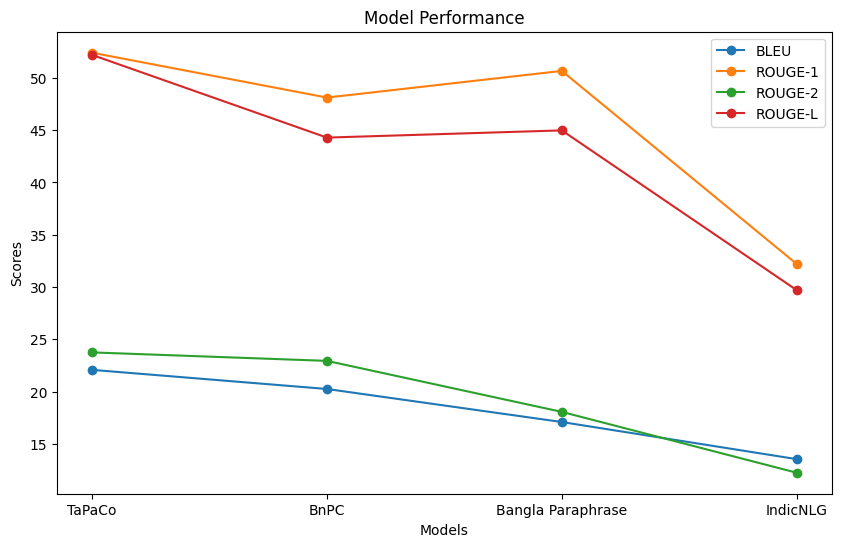

In [ ]:
import matplotlib.pyplot as plt

labels = ['TaPaCo', 'BnPC', 'Bangla Paraphrase', 'IndicNLG']
bleu_scores = [22.07, 20.24, 17.08, 13.53]
rouge1_scores = [52.41, 48.12, 50.67, 32.20]
rouge2_scores = [23.74, 22.93, 18.05, 12.23]
rougel_scores = [52.20, 44.29, 44.98, 29.70]

x = list(range(len(labels)))

plt.figure(figsize=(10,6))

plt.plot(x, bleu_scores, marker='o', label='BLEU')
plt.plot(x, rouge1_scores, marker='o', label='ROUGE-1')
plt.plot(x, rouge2_scores, marker='o', label='ROUGE-2')
plt.plot(x, rougel_scores, marker='o', label='ROUGE-L')

plt.xticks(x, labels)
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance')
plt.legend()

plt.show()


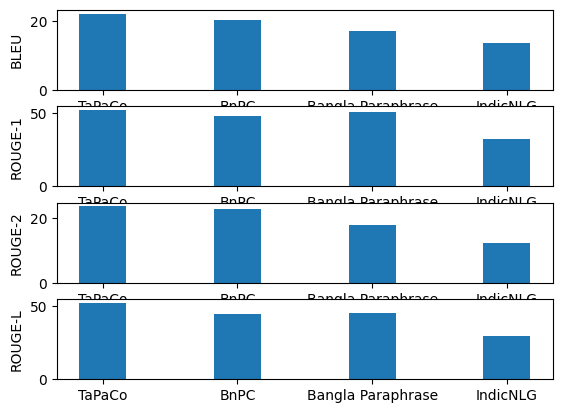

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['TaPaCo', 'BnPC', 'Bangla Paraphrase', 'IndicNLG']
bleu_scores = [22.07, 20.24, 17.08, 13.53]
rouge1_scores = [52.41, 48.12, 50.67, 32.20]
rouge2_scores = [23.74, 22.93, 18.05, 12.23]
rougel_scores = [52.20, 44.29, 44.98, 29.70]

x = np.arange(len(labels))
width = 0.35

fig, axs = plt.subplots(4)

axs[0].bar(x, bleu_scores, width)
axs[1].bar(x, rouge1_scores, width)
axs[2].bar(x, rouge2_scores, width)
axs[3].bar(x, rougel_scores, width)

axs[0].set_ylabel('BLEU')
axs[1].set_ylabel('ROUGE-1')
axs[2].set_ylabel('ROUGE-2')
axs[3].set_ylabel('ROUGE-L')

for ax in axs:
    ax.set_xticks(x)
    ax.set_xticklabels(labels)

plt.show()


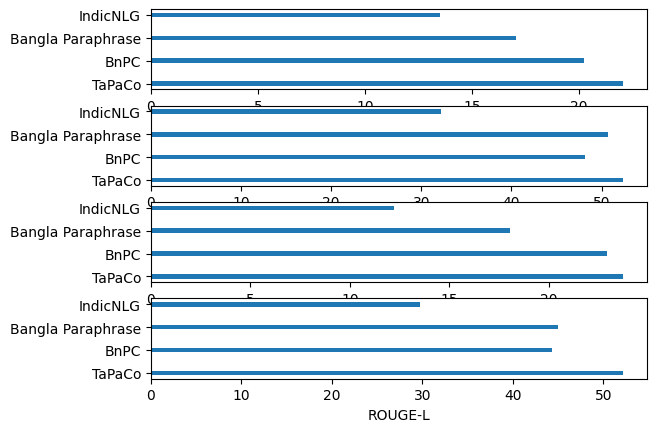

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['TaPaCo', 'BnPC', 'Bangla Paraphrase', 'IndicNLG']
bleu_scores = [22.07, 20.24, 17.08, 13.53]
rouge1_scores = [52.41, 48.12, 50.67, 32.20]
rouge2_scores = [23.74, 22.93, 18.05, 12.23]
rougel_scores = [52.20, 44.29, 44.98, 29.70]

y = np.arange(len(labels))
height = 0.2

fig, axs = plt.subplots(4)

axs[0].barh(y, bleu_scores, height)
axs[1].barh(y, rouge1_scores, height)
axs[2].barh(y, rouge2_scores, height)
axs[3].barh(y, rougel_scores, height)

axs[0].set_xlabel('BLEU')
axs[1].set_xlabel('ROUGE-1')
axs[2].set_xlabel('ROUGE-2')
axs[3].set_xlabel('ROUGE-L')

for ax in axs:
    ax.set_yticks(y)
    ax.set_yticklabels(labels)

plt.show()


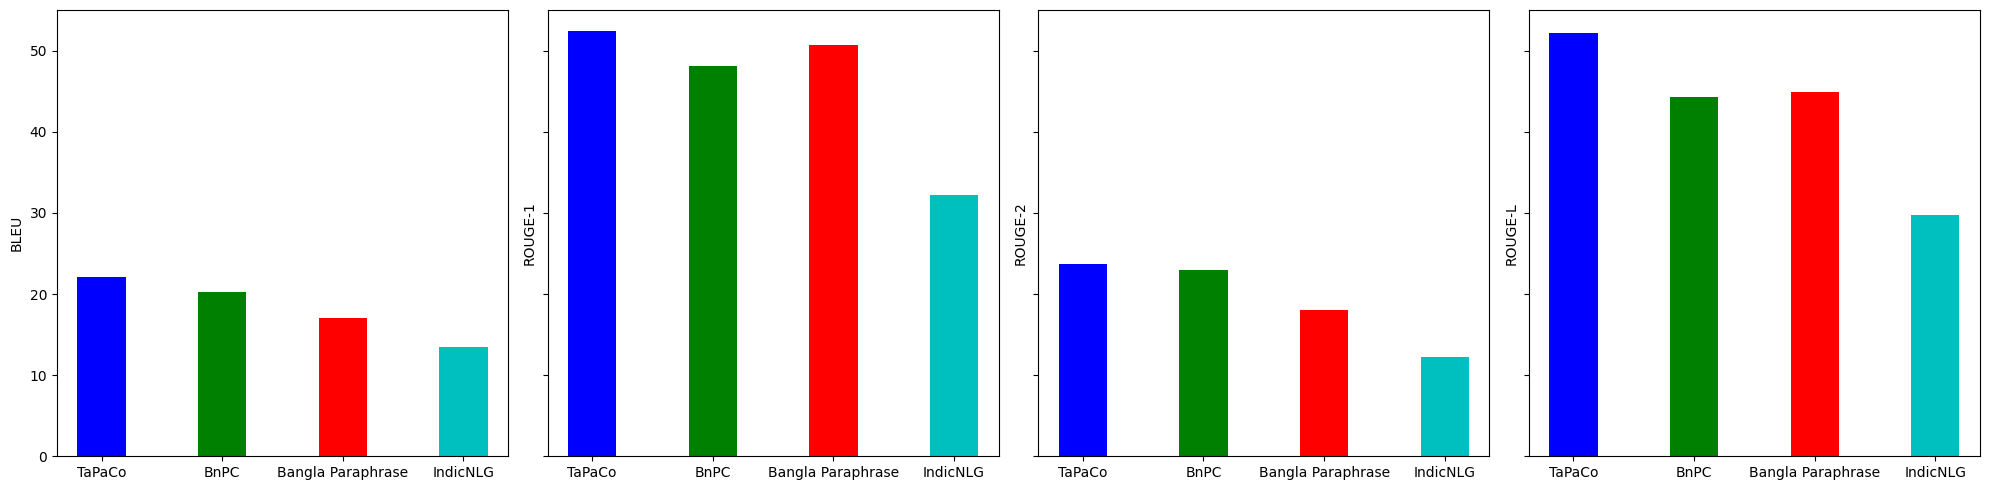

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['TaPaCo', 'BnPC', 'Bangla Paraphrase', 'IndicNLG']
bleu_scores = [22.07, 20.24, 17.08, 13.53]
rouge1_scores = [52.41, 48.12, 50.67, 32.20]
rouge2_scores = [23.74, 22.93, 18.05, 12.23]
rougel_scores = [52.20, 44.29, 44.98, 29.70]

x = np.arange(len(labels))
width = 0.2

fig, axs = plt.subplots(1, 4, figsize=(20,5), sharey=True)

colors = ['b', 'g', 'r', 'c']

for i in range(4):
    axs[0].bar(x[i], bleu_scores[i], width*2, color=colors[i])
    axs[1].bar(x[i], rouge1_scores[i], width*2, color=colors[i])
    axs[2].bar(x[i], rouge2_scores[i], width*2, color=colors[i])
    axs[3].bar(x[i], rougel_scores[i], width*2, color=colors[i])

axs[0].set_ylabel('BLEU')
axs[1].set_ylabel('ROUGE-1')
axs[2].set_ylabel('ROUGE-2')
axs[3].set_ylabel('ROUGE-L')

for ax in axs:
    ax.set_xticks(x)
    ax.set_xticklabels(labels)

plt.tight_layout()
plt.show()


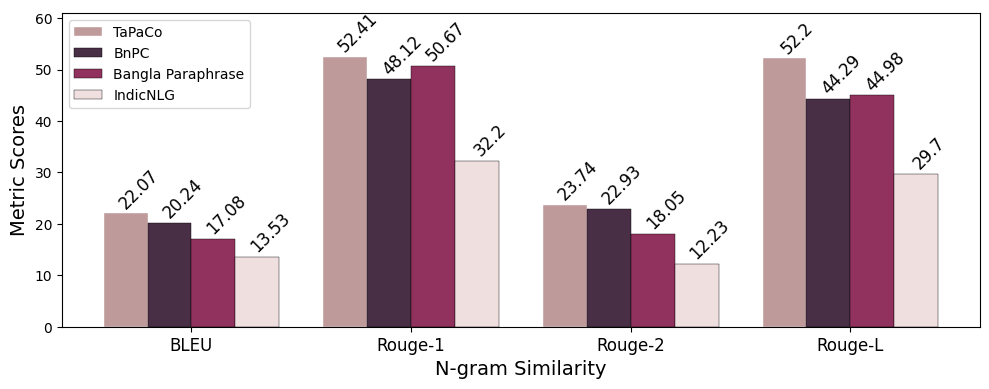

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['BLEU', 'Rouge-1', 'Rouge-2', 'Rouge-L']
tapaco_scores = [22.07, 52.41, 23.74, 52.20]
bnpc_scores = [20.24, 48.12, 22.93, 44.29]
bangla_paraphrase_scores = [17.08, 50.67, 18.05, 44.98]
indic_scores = [13.53, 32.20, 12.23, 29.70]

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 4))

colors = ['#bf9a9b', '#482f46', '#91315e', '#f0dfdf']

ax.bar(x - width * 1.5, tapaco_scores, width, color=colors[0], edgecolor='white', linewidth=0.3, label='TaPaCo')
ax.bar(x - width / 2, bnpc_scores, width, color=colors[1], edgecolor='black', linewidth=0.3, label='BnPC')
ax.bar(x + width / 2, bangla_paraphrase_scores, width, color=colors[2], edgecolor='black', linewidth=0.3, label='Bangla Paraphrase')
ax.bar(x + width * 1.5, indic_scores, width, color=colors[3], edgecolor='black', linewidth=0.3, label='IndicNLG')

ax.set_ylabel('Metric Scores', fontsize=14)
ax.set_xlabel('N-gram Similarity', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
ax.legend(fontsize=10)  # Smaller legend font size

# Set the y-axis limit to 20 (since the highest bar is at 16)
ax.set_ylim(0, 61)

# Add y-values in the middle of each bar
for i in range(len(x)):
    for j, scores in enumerate([tapaco_scores, bnpc_scores, bangla_paraphrase_scores, indic_scores]):
        y_val = scores[i]
        ax.text(x[i] + (j - 1.2) * width, y_val + 1 , str(y_val), ha='center', fontsize=12,
                rotation=45)

# Save the plot as an SVG file
plt.tight_layout()
plt.savefig('ngram_similarity.svg', format='svg')

# Show the plot (optional)
plt.show()


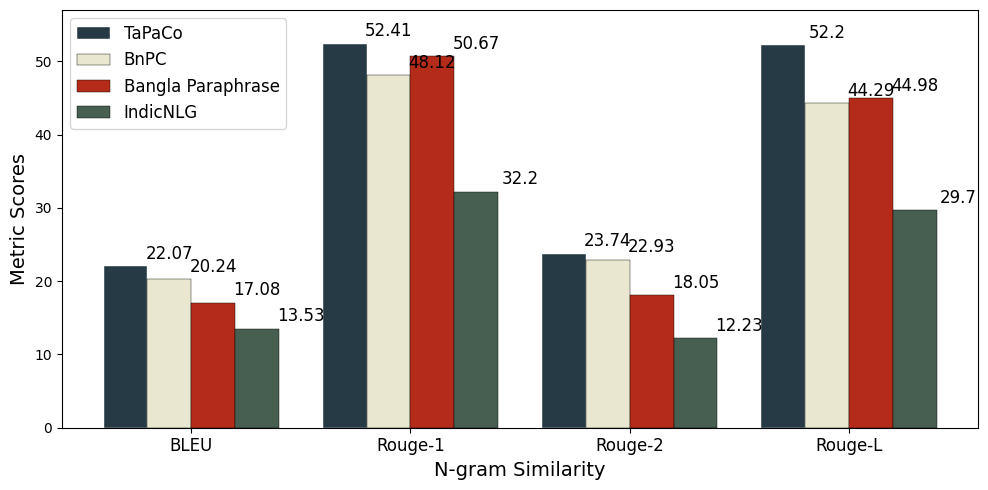

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['BLEU', 'Rouge-1', 'Rouge-2', 'Rouge-L']
tapaco_scores = [22.07, 52.41, 23.74, 52.20]
bnpc_scores = [20.24, 48.12, 22.93, 44.29]
bangla_paraphrase_scores = [17.08, 50.67, 18.05, 44.98]
indic_scores = [13.53, 32.20, 12.23, 29.70]

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 5))

colors = ['#263a45', '#e9e7cf', '#b42c19', '#475f51']

ax.bar(x - width * 1.5, tapaco_scores, width, color=colors[0], edgecolor='white', linewidth=0.3, label='TaPaCo')
ax.bar(x - width / 2, bnpc_scores, width, color=colors[1], edgecolor='black', linewidth=0.3, label='BnPC')
ax.bar(x + width / 2, bangla_paraphrase_scores, width, color=colors[2], edgecolor='black', linewidth=0.3, label='Bangla Paraphrase')
ax.bar(x + width * 1.5, indic_scores, width, color=colors[3], edgecolor='black', linewidth=0.3, label='IndicNLG')

ax.set_ylabel('Metric Scores', fontsize=14)
ax.set_xlabel('N-gram Similarity', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
ax.legend(fontsize=12)

# Set the y-axis limit to 20 (since the highest bar is at 16)
ax.set_ylim(0, 57)

# Add y-values on top of each bar
for i in range(len(x)):
    for j, scores in enumerate([tapaco_scores, bnpc_scores, bangla_paraphrase_scores, indic_scores]):
        y_val = scores[i]
        ax.text(x[i] + (j - 1) * width + width/2 , y_val + 1 , str(y_val), ha='center', fontsize=12)

plt.tight_layout()
plt.show()
